# 1) Introduction:
This is report assgnment using dataset [Melbourne Housing dataset](https://www.kaggle.com/anthonypino/melbourne-housing-market)  

__Some Keys Detail__

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
* S - property sold;
* SP - property sold prior;
* PI - property passed in;
* PN - sold prior not disclosed;
* SN - sold not disclosed;
* NB - no bid;
* VB - vendor bid;
* W - withdrawn prior to auction;
* SA - sold after auction;
* SS - sold after auction price not disclosed.
* N/A - price or highest bid not available.

Type:
* br - bedroom(s);
* h - house,cottage,villa, semi,terrace;
* u - unit, duplex;
* t - townhouse;
* dev site - development site;
* o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
# 2) Task:
   1. Examine and explore data (visualization, interactions among features)
   2. Apply the model for prediction with holdout and cross validation
   3. Using PCA, apply the model with holdout and cross validation
   4. Visualize the residue and homoscedasticity
   5. Tune the model if necessary
   6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better,etc.)
   7. Include conclusions for summary

# Import Library

In [63]:
import pandas as pd

import seaborn as sns

In [64]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df.shape
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

the Postcode has not appeared on some Keys Detail 

In [77]:
df = df.drop(['Postcode'],axis = 1)
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea'],
      dtype='object')

# Exploratory Data Analysis
__step 1: check size of dataset__

In [78]:
print('df have size {}'.format(df.shape))

df have size (48433, 12)


__step 2: Missing values__

In [79]:
df.isna().sum()


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

the Price have 14590 is NONE values. and because the Price is target attribute so we must drop rows is nan

In [80]:
df.dropna(subset = ["Price"], inplace=True)
print(df.isna().sum())
print(df.shape)
df.info()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64
(48433, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Regionname     48433 non-null  object 
 9   Propertycount  48433 non-null  int64  
 10  Distance       48433 non-null  float64
 11  CouncilArea    48433 non-null  object 
dtypes: float64(2), in

affter remove some rows, We check size of dataset

We can see 
* any attribute haven't  null values
* 8 columns is object 
* 3 columns is int64
* 2 columns is int64

__step3: descriptive statistic__

In [81]:
df.describe(percentiles = [0.01,.1,.25,.5,.75,.9,.95,.99 ])

,Rooms,Price,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000
mean,3.071666,9.978982e+05,7566.399913,12.702761
std,0.944708,5.934989e+05,4457.405884,7.550030
min,1.000000,8.500000e+04,39.000000,0.000000
1%,1.000000,3.120000e+05,852.000000,1.800000
10%,2.000000,4.800400e+05,2674.000000,4.300000
25%,2.000000,6.200000e+05,4280.000000,7.000000
50%,3.000000,8.300000e+05,6567.000000,11.700000
75%,4.000000,1.220000e+06,10412.000000,16.700000
90%,4.000000,1.700000e+06,14577.000000,21.500000


Did n't see anything out of the ordinary

In [82]:
df.describe(include = 'O')

,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
count,48433,48433,48433,48433,48433,48433,48433,48433
unique,370,44739,3,5,422,112,8,34
top,Reservoir,14 Northcote St,h,S,Barry,24/03/2018,Northern Metropolitan,Darebin City Council
freq,1067,7,34161,30624,4818,880,13598,3462


we can see:
* the Address has  unique very hight.
*  SellerG and Suburb have unique hight

In [86]:
df_numberic = df[['Rooms','Price','Propertycount','Distance']] 
df_numberic.corr()

,Rooms,Price,Propertycount,Distance
Rooms,1.000000,0.412438,-0.057378,0.278666
Price,0.412438,1.000000,-0.060769,-0.253668
Propertycount,-0.057378,-0.060769,1.000000,0.007633
Distance,0.278666,-0.253668,0.007633,1.000000


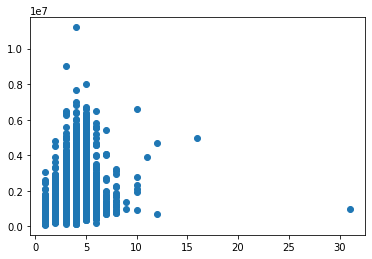

In [84]:
import matplotlib.pyplot as plt
plt.scatter(x = df_numberic.Rooms.values , y = df_numberic.Price.values )
plt.show()


the data focus on the number of rooms is 4.

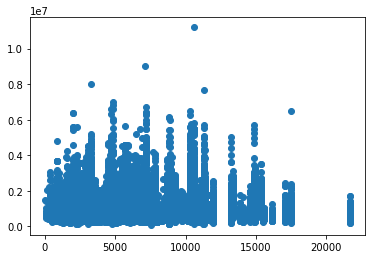

In [87]:
plt.scatter(x = df_numberic.Propertycount.values , y = df_numberic.Price.values )
plt.show()


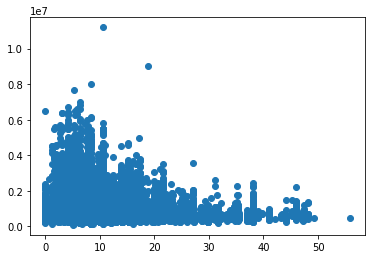

In [89]:
plt.scatter(x = df_numberic.Distance.values , y = df_numberic.Price.values )
plt.show()
